## Task 9

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from main import average_particle_simulation
from utils import avg_vel

In [152]:
plt.style.use("Solarize_Light2")

In [5]:
particle_1 = {
        "r": 12e-9,
        "L": 20e-6,
        "alpha": 0.2,
        "eta": 1e-3,
        "kbt": 26 * 1.60e-22,
        "delta_u": 80 * 1.60e-19,
    }

In [6]:
%%time
tot_time = 10.
N = 5000
tau = 0.2
avg_pos, nc, last_pos = average_particle_simulation(particle_1, tot_time, N, tau)

{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176
Wall time: 39.5 s


## Average positions from different $\tau$
---

In [139]:
from main import tau_simulation

In [193]:
tau = np.linspace(0.4,0.8, 20)
N = 5000

In [195]:
avg_pos, nc_list, last_steps = tau_simulation(particle_1 ,N, tau, True)

{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: [56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588, 56588]
Loop took 16.798231601715088s. Loop number: 0
Loop took 16.003016471862793s. Loop number: 1
Loop took 15.719032526016235s. Loop number: 2
Loop took 15.652989864349365s. Loop number: 3
Loop took 15.35494613647461s. Loop number: 4
Loop took 15.536462545394897s. Loop number: 5
Loop took 15.45271611213684s. Loop number: 6
Loop took 16.757690906524658s. Loop number: 7
Loop took 16.604054927825928s. Loop number: 8
Loop took 16.512752056121826s. Loop number: 9
Loop took 17.553650856018066s. Loop number: 10
Loop took 17.532116889953613s. Loop number: 11
Loop took 18.561258792877197s. Loop number: 12
Loop took 17.366150617599487s. Loop number: 13
Loop took 17.3030188083648

In [196]:
np.save("simulations/avg_pos_N_5000_opt", [avg_pos, nc_list, last_steps, tau])

In [155]:
ncc = nc_list[0]

In [157]:
dt = ncc['dt']
N_steps = ncc['N_steps']
omega = ncc['omega']

In [161]:
tl = dt*N_steps / omega

In [197]:
mt = [n['dt'] * n['N_steps'] / n['omega'] for n in nc_list]

In [198]:
avg_velocities = [avg_vel(1e6*av*particle_1['L'], mt[i]) for i,av in enumerate(avg_pos)]

No handles with labels found to put in legend.


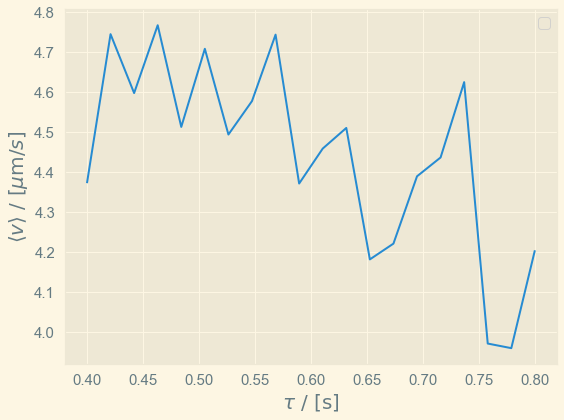

In [199]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)
plt.plot(tau,avg_velocities)
plt.legend(loc ='best', fontsize=15)
plt.ylabel(fr"$\langle v\rangle\ / \ [\mu\mathrm{{m}} / s]$", size = 20)
plt.xlabel(fr"$\tau\ /\ [\mathrm{{s}}]$", size = 20)
plt.xticks(size =15)
plt.yticks(size =15)
plt.savefig("img/average_drift_r1_optimal.png", facecolor=fig.get_facecolor())

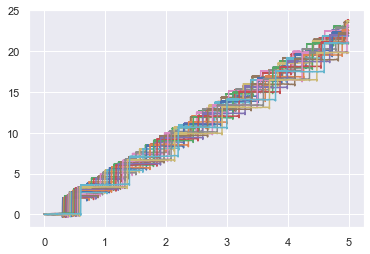

In [207]:
for i,av in enumerate(avg_pos):
    t_list = np.linspace(0, mt[i], av.shape[0])
    plt.plot(t_list, 1e6*av*particle_1['L'])

In [204]:
a1 = avg_pos[0]

In [206]:
(a1[-1] - a1[0]) / mt[0]

0.21861018970061624

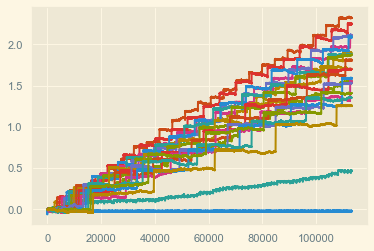

In [14]:
for av in enumeratre(avg_pos):
    plt.plot(av)

## Some trajectories for different $\tau$
---

In [86]:
tau_list = [0.2,0.4,0.5,0.8,1.0]
trajectories = []
for tau in tau_list:
    traj, nc,_ = average_particle_simulation(particle_1, tot_time, 1,  tau, True)
    trajectories.append(traj)

{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176
{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176
{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176
{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176
{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 2.261946710584651e-10, 	omega: 141.47106052612915,	 D: 0.000325
dt: 0.0125, 	 N_steps: 113176


In [87]:
N_steps = nc['N_steps']
dt = nc['dt']
omega = nc['omega']

In [88]:
def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Text(0.5, 1.0, '$\\Delta U = 80\\mathrm{eV}$')

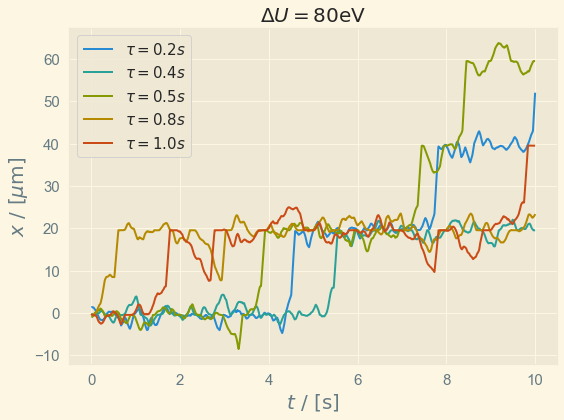

In [96]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)
for i,traj in enumerate(trajectories):
    tt = moving_avg(traj, 1000)
    t_l = np.linspace(0,max_time,tt.shape[0])
    plt.plot(t_l,1e6*tt * particle_1['L'], label=fr"$\tau = {tau_list[i]}s$")
plt.legend(loc ='upper left', fontsize=15)
plt.ylabel(fr"$x\ / \ [\mu\mathrm{{m}}]$", size = 20)
plt.xlabel(fr"$t\ /\ [\mathrm{{s}}]$", size = 20)
plt.xticks(size =15)
plt.yticks(size =15)
plt.title(fr"$\Delta U = 80\mathrm{{eV}}$", size = 20)